# STEP 1

<div class="alert alert-block alert-info">
<b>Load dataset and import librairies
</div>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize']=(12,6)
sns.set
import warnings
warnings.filterwarnings("ignore")

# STEP 2

<div class="alert alert-block alert-info">
<b>Import the dataset
</div>

In [2]:
happiness_data=pd.read_csv('world_happiness_report_2019.csv')

# STEP 3

<div class="alert alert-block alert-info">
<b>We can observe the dataset using the head()function, which returns the first five records from the dataset
</div>

In [4]:
happiness_data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


# STEP 4

<div class="alert alert-block alert-info">
<b>Using the shape function, we can observe the dimensions of the data
</div>

In [3]:
happiness_data.shape

(156, 9)

<font color='green'>There are 9 columns and 156 observations</font>

# STEP 5

<div class="alert alert-block alert-info">
<b>The info() method shows some of the characteristics of the data such as Column Name
</div>

In [5]:
happiness_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


<font color='green'>We don’t have any missing values and numerical variables can have type 'int64' or 'float64'</font>

# STEP 6

<div class="alert alert-block alert-info">
<b>We use describe() function, which shows basic statistical characteristics of each numerical feature
</div>

In [6]:
happiness_data.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


# STEP 7

<div class="alert alert-block alert-info">
<b>We can check for duplicate values in our dataset
</div>

In [8]:
duplicate_Values=happiness_data.duplicated()
print(duplicate_Values.sum())
happiness_data[duplicate_Values]

0


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption


<font color='green'>We don’t have any duplicate values </font>

# STEP 8

<div class="alert alert-block alert-info">
<b>Let's have a look to the data type
</div>

In [9]:
cat_col = [col for col in happiness_data.columns if happiness_data[col].dtype ==
           'object']  # Categorical columns
num_col = [col for col in happiness_data.columns if happiness_data[col].dtype !=
           'object']  # Numerical columns

print('Categorical Columns: ', cat_col)
print('Numerical Columns: ', num_col)

# As it can be seen no column has been left behind
print(f'Total columns: {len(cat_col) + len(num_col)}')

Categorical Columns:  ['Country or region']
Numerical Columns:  ['Overall rank', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
Total columns: 9


<font color='green'>It's mainly numerical variables and only 2 categorical variables </font>

# STEP 8

<div class="alert alert-block alert-info">
<b>Handling the outliers in the data, i.e. the extreme values in the data. <br>We can find the outliers in our data using a Boxplot
</div>

<function matplotlib.pyplot.show(close=None, block=None)>

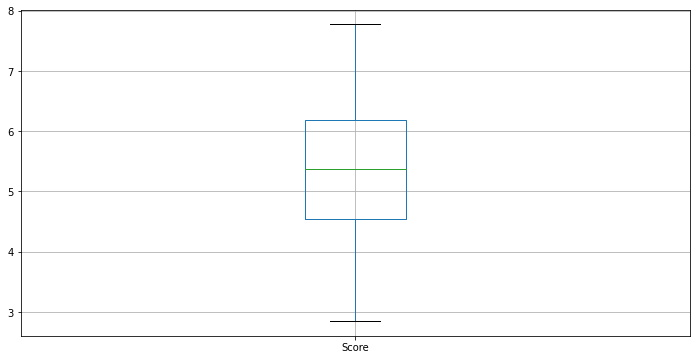

In [10]:
happiness_data.boxplot(column=['Score'])
plt.show

<font color='green'>Our dataframe is now free from outliers</font>

# STEP 9

<div class="alert alert-block alert-info">
<b>We can find the pairwise correlation between the different columns of the data using the corr() method. <br>  All non-numeric data type column will be ignored
</div>

In [11]:
happiness_data.corr()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,1.000000,-0.989096,-0.801947,-0.767465,-0.787411,-0.546606,-0.047993,-0.351959
Score,-0.989096,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
GDP per capita,-0.801947,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social support,-0.767465,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Healthy life expectancy,-0.787411,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom to make life choices,-0.546606,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,-0.047993,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Perceptions of corruption,-0.351959,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


# STEP 10

<div class="alert alert-block alert-info">To have a better outlook, we create a heatmap using Seaborn to visualize the correlation 
</div>

<AxesSubplot:>

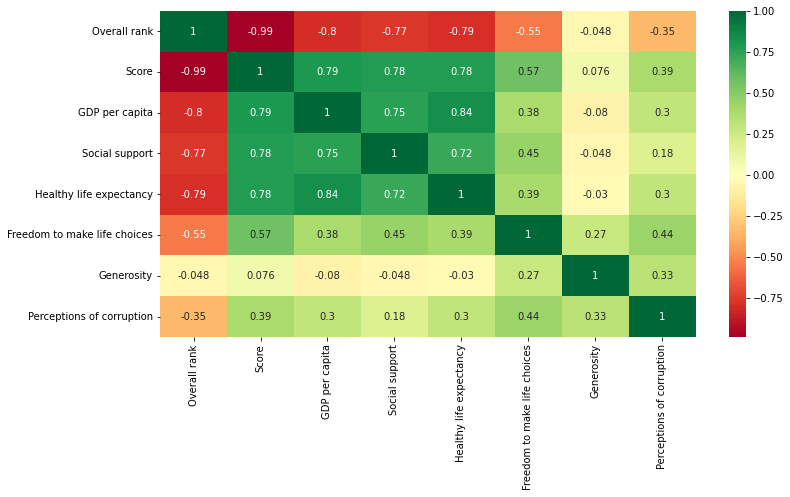

In [14]:
sns.heatmap(happiness_data.corr(),annot=True,cmap='RdYlGn')

<font color='green'>There is a high correlation between:<br>GPD (economy) and Healthy life expenctancy = 0,84 <br>
Score and GPD(economy) = 0,79 <br> Score and social support = 0,78</font>

#### We can practice the corr() function with selected columns <br>For example 'generosity', 'overall rank' and 'corruption'

In [50]:
happiness_data[['Generosity', 'Overall rank', 'Perceptions of corruption']].corr()

,Generosity,Overall rank,Perceptions of corruption
Generosity,1.000000,-0.047993,0.326538
Overall rank,-0.047993,1.000000,-0.351959
Perceptions of corruption,0.326538,-0.351959,1.000000


# STEP 11

<div class="alert alert-block alert-info">Using Seaborn, we visualize the relation between Economy (GDP per Capita) and Happiness Score by using a regression plot <br>We use "regplot" which plots the scartterplot plus the fitted regression libe for the data.
</div>

<AxesSubplot:xlabel='GDP per capita', ylabel='Score'>

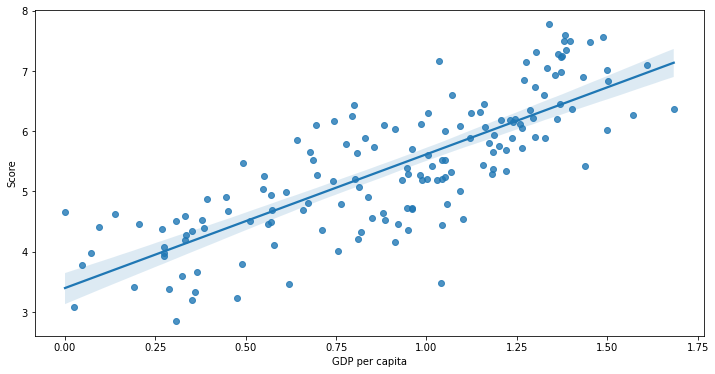

In [90]:
sns.regplot(x='GDP per capita', y='Score', data=happiness_data)

<font color='green'> As the Economy increases, the Happiness Score increases as well as denoting a positive correlation between 
those two variables <br> GPD per capita seems to be a pretty good predictor of happiness score <br>The regression line is almost a perfect diagonal line</font>

In [63]:
happiness_data[['GDP per capita', 'Score']].corr()

# The correlation is approximately 0.79

,GDP per capita,Score
GDP per capita,1.000000,0.793883
Score,0.793883,1.000000


<font color='green'>Be careful to distinguish correlation (interdependence) vs. causation (cause/effect relationship)  </font>

# Step 12

<div class="alert alert-block alert-info">The P-value is to know the significance of the correlation estimate
when p-value is <br> < 0.001 leads to strong evidence <br> < 0.05 leads to moderate evidence <br> < 0.1 leads to weak evidence <br> > 0.1 leads to no evidence </div>

In [92]:
from scipy import stats

In [93]:
pearson_coef, p_value = stats.pearsonr(happiness_data['GDP per capita'], happiness_data['Score'])
print ("The Pearson Correlation coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation coefficient is 0.7938828678781276  with a P-value of P = 4.315480913319409e-35


<font color='green'>The linear relationship is strong (app. 0.79) and the correlation is statistically significant</font>
